In [1]:
import sys
import pathlib
import pandas as pd
import numpy as np
import boto3
import time

ROOT = pathlib.Path().absolute().parent.as_posix()
if ROOT not in sys.path:
    sys.path.append(ROOT)
    
from helpers import *

In [2]:
df = fill_penultimate_df()

df.to_csv(ROOT_FOLDER_PATH + '/final_df.csv', index = True)
upload_df_to_s3(bucket = 'asdi-hackathon', df = df, key = 'final-data/final_df.csv')

popd_weight =  1.3304790199790024
apply_greenspace_score_function complete
Time taken: 8.17
Successful upload


In [3]:
print(df.columns)

Index(['Latitude', 'Longitude', 'Airport', 'Water', 'Building', 'Green_Space',
       'Railway_Station', 'Urban_Area', 'Value_co', 'Value_no2', 'Value_o3',
       'Value_so2', 'Value_ai', 'AQ_score', 'Pop_density', 'Greenspace_score',
       'avg_penalty_reward'],
      dtype='object')


In [4]:
df

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,Value_co,Value_no2,Value_o3,Value_so2,Value_ai,AQ_score,Pop_density,Greenspace_score,avg_penalty_reward
0,51.737184,-0.620643,0,0,0,1,0,0,0.764264,0.004088,7.248996,0.032141,-1.031149,0.360777,1.445061,1.042031,0.958333
1,51.737184,-0.617012,0,0,0,0,0,0,0.764304,0.004140,7.250456,0.032148,-1.035486,0.361721,1.445061,1.082402,1.000000
2,51.737184,-0.613382,0,0,1,1,0,0,0.764350,0.004143,7.250998,0.032186,-1.037714,0.361822,1.445061,1.082435,1.000000
3,51.737183,-0.609751,0,0,1,1,0,0,0.764624,0.004142,7.251659,0.032087,-1.035978,0.362065,3.517970,2.461498,1.000000
4,51.737183,-0.606120,0,0,0,1,0,0,0.764288,0.004142,7.252279,0.031958,-1.039697,0.361140,3.517970,2.363676,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58243,51.238843,0.312049,0,0,0,1,0,0,0.764161,0.002717,7.310894,0.028964,-0.748909,0.355456,0.916133,0.703047,0.958333
58244,51.238815,0.315640,0,0,0,1,0,0,0.764524,0.002728,7.310550,0.029058,-0.745427,0.356564,0.916133,0.703418,0.958333
58245,51.238786,0.319231,0,1,1,1,0,0,0.764969,0.002732,7.310113,0.029139,-0.744029,0.357403,0.916133,0.627518,0.833333
58246,51.238757,0.322822,0,1,1,0,0,0,0.765131,0.002735,7.311109,0.029128,-0.740657,0.358034,0.916133,0.653122,0.875000


In [5]:
df['Greenspace_score'].describe()

count    58248.000000
mean         3.641332
std          7.434067
min          0.193901
25%          0.921365
50%          1.983318
75%          4.182211
max        379.868041
Name: Greenspace_score, dtype: float64

In [6]:
df['AQ_score'].describe()

count    58248.000000
mean         0.381069
std          0.032828
min          0.221994
25%          0.356565
50%          0.374261
75%          0.403724
max          0.652611
Name: AQ_score, dtype: float64

In [7]:
df['avg_penalty_reward'].describe()

count    58248.000000
mean         0.984316
std          0.083402
min          0.666667
25%          0.958333
50%          1.000000
75%          1.041667
max          1.083333
Name: avg_penalty_reward, dtype: float64

In [8]:
df2 = df.sort_values('Greenspace_score', ascending = False)
df2 = df2.drop(['Value_co', 'Value_no2', 'Value_o3', 'Value_so2', 'Value_ai'], axis = 1)
df2

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,AQ_score,Pop_density,Greenspace_score,avg_penalty_reward
30105,51.479729,-0.104523,0,0,1,1,0,1,0.425066,547.978149,379.868041,1.041667
29054,51.488640,-0.086743,0,0,1,1,0,1,0.423175,528.199707,366.161781,1.041667
18531,51.578552,-0.078596,0,0,1,1,0,1,0.425238,429.353668,297.666336,1.041667
29291,51.486798,-0.184159,0,0,1,0,0,1,0.425906,358.050598,258.181098,1.083333
25867,51.516024,-0.177874,0,0,1,0,0,1,0.434358,353.029144,254.565085,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...
29470,51.485298,-0.490973,0,1,0,1,0,0,0.399632,0.137428,0.206157,0.791667
32110,51.462815,-0.490099,0,1,0,1,0,0,0.398221,0.137428,0.205685,0.791667
32109,51.462820,-0.493708,0,1,0,1,0,0,0.397893,0.137428,0.205575,0.791667
32111,51.462811,-0.486491,0,1,0,1,0,0,0.397737,0.137428,0.205523,0.791667


In [9]:
len(df2)

58248

In [10]:
df2[df2['Greenspace_score'] > 100]

,Latitude,Longitude,Airport,Water,Building,Green_Space,Railway_Station,Urban_Area,AQ_score,Pop_density,Greenspace_score,avg_penalty_reward
30105,51.479729,-0.104523,0,0,1,1,0,1,0.425066,547.978149,379.868041,1.041667
29054,51.488640,-0.086743,0,0,1,1,0,1,0.423175,528.199707,366.161781,1.041667
18531,51.578552,-0.078596,0,0,1,1,0,1,0.425238,429.353668,297.666336,1.041667
29291,51.486798,-0.184159,0,0,1,0,0,1,0.425906,358.050598,258.181098,1.083333
25867,51.516024,-0.177874,0,0,1,0,0,1,0.434358,353.029144,254.565085,1.083333
29290,51.486811,-0.187769,0,0,1,1,0,1,0.425464,362.062378,251.036386,1.041667
25882,51.515809,-0.123681,0,0,1,1,0,1,0.442330,361.602051,250.723045,1.041667
24548,51.527319,-0.192689,0,0,1,1,0,1,0.443005,357.799805,248.088474,1.041667
24811,51.525071,-0.192616,0,0,1,0,0,1,0.442231,323.212494,233.079573,1.083333
20099,51.565224,-0.114359,0,0,1,1,0,1,0.446052,328.045868,227.471271,1.041667


<AxesSubplot:>

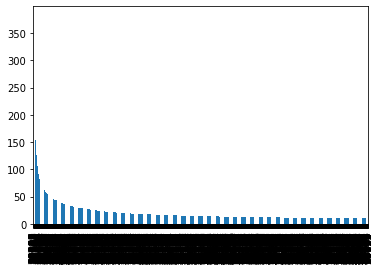

In [21]:
df2[df2['Greenspace_score'] > 10]['Greenspace_score'].plot(kind = 'bar')